<a href="https://colab.research.google.com/github/Stepeech/NNLearn/blob/main/%D0%9F%D0%A02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Первая нейронная сеть на Keras


Сегодня обсудим:
1. Как создать нейронную сеть в Keras
2. Как обучить нейронную сеть в Keras


И сегодня обучим три нейронные сети для решения задач:
1. Нейрон для умножения
2. Нейросеть для сложения
3. Нейросеть для классификации изображений

Давайте создадим нейронную сеть, состоящую из одного нейрона.


<img src='https://drive.google.com/uc?id=1Qx71h2FmXS6uKHmhcIKtp49G5nqMncWK'>

- `Sequential` - это класс последовательности слоев в нейронной сети, у нас пока будет только один слой, но сюда можно добавлять сколь угодно слоев и это будет сеть, состоящая из последовательности слоев. 
- `Dense` - это класс полносвязного/линейного слоя, все нейроны связаны друг с другом.
- `units=1` - это количество нейронов в слое. У нас 1 нейрон.
- `input_shape=(1,)` - это входная размерность объекта. У нас только 1 вход.
- `activation='relu'` - это функция активации, которая добавляет в слой нелинейности, именно из-за неё мы можем получать более сложные результаты работы сети. 

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential([
    Dense(1, input_shape=(1,), activation='relu')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[-0.9562701]], dtype=float32), array([0.], dtype=float32)]

Инициализация весов всегда разная, если её не зафиксировать:



```
# for reproducible weights initialization
import tensorflow as tf
tf.random.set_seed(1)
```



In [ ]:
import tensorflow as tf
tf.random.set_seed(1)

model = Sequential([
    Dense(1, input_shape=(1,), activation='relu')
])

model.get_weights()

[array([[-0.6764704]], dtype=float32), array([0.], dtype=float32)]

## Нейрон для умножения на 3

Создадим обучающие данные

In [ ]:
import numpy as np

X = np.array([[1], [3], [2], [10], [4], [7], [8]])
y = np.array([[3, 9, 6, 30, 12, 21, 24]]).T

Для того, что обучить нейронную сеть для любой задачи нужно ответить на три вопроса:
1. Какая архитектура сети?
2. Что оптимизируем?
3. Как обучаем?

### Какая архитектура сети

Создадим сеть, она очень простая, состоит из одного слоя и одного нейрона.

<img src='https://drive.google.com/uc?id=1Qx71h2FmXS6uKHmhcIKtp49G5nqMncWK'>

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential([
    Dense(1, input_shape=(1,), activation='linear')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Два веса получилось из-за того, что для каждого нейрона в линейном слое есть отклонение (bias).

In [ ]:
w1, w0 = model.get_weights()
w1, w0

(array([[-0.2635628]], dtype=float32), array([0.], dtype=float32))

Теперь сделаем предсказание этой моделью на одном объекте. 

In [ ]:
X[:1]

array([[1]])

Предсказание получается очень далекими от истины, потому что сеть еще не знает, для чего её создали.

In [ ]:
model.predict(X[:1])

1/1 [==============================] - 3s 3s/step


array([[-0.2635628]], dtype=float32)

In [ ]:
w1 * X[:1] + w0

array([[-0.2635628]])

In [ ]:
from keras.activations import linear
linear(w1 * X[:1] + w0)

array([[-0.2635628]])

### Что оптимизируем

У нас задача регрессии, поэтому будем брать функцию потерь для этой задачи, к примеру MSE (средняя квадратичная ошибка).

Вдобавок можно взять еще и метрику, которую будем считать и понимать, обучается ли сеть.

### Как оптимизируем

Про этот вопрос будем более подробно говорить в следующих занятиях, но пока условимся, что оптимизатор помогает ошибке быстрее уменьшаться, а значит помогает сеть быстрее обучаться.

Есть несколько видов оптимизаторов, тот же градиентный спуск - это один из методов оптимизации для нейронной сети.

In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics='mae')

In [ ]:
%%time
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0201 - mae: 0.1216
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0199 - mae: 0.1209
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0196 - mae: 0.1202
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0194 - mae: 0.1196
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0192 - mae: 0.1189
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0190 - mae: 0.1183
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0188 - mae: 0.1176
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0186 - mae: 0.1170
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0184 - mae: 0.1163
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0182 - mae: 0.1157
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - lo

Сеть обучается, ошибка падает, метрика становится лучше, всё замечательно.

Теперь проверим, а как модель работает на новых данных.

In [ ]:
user_inp1, user_inp2 = 5, -9
print(f"Проверка на новых данных: {user_inp1} {user_inp2}")
print("Предсказание нейронной сети: ")
print(model.predict(np.array([[user_inp1], [user_inp2]])))

Проверка на новых данных: 5 -9
Предсказание нейронной сети: 
1/1 [==============================] - 0s 20ms/step
[[ 15.042361]
 [-26.643518]]


Предсказания очень похожи на истину.

Еще можем посмотреть, как поменялись наши веса после обучения.

In [ ]:
nw1, nw0 = model.get_weights()
print('w1 before', w1, 'w1 after', nw1)
print('w0 before', w0, 'w0 after', nw0)

w1 before [[-0.2635628]] w1 after [[2.977563]]
w0 before [0.] w0 after [0.1545471]


И проверимся на всех обучающих данных.

In [ ]:
import pandas as pd

pd.DataFrame({
   'true': np.squeeze(y),
   'pred': np.squeeze(model.predict(X))
})

1/1 [==============================] - 0s 34ms/step


,true,pred
0,3,3.132110
1,9,9.087235
2,6,6.109673
3,30,29.930176
4,12,12.064798
5,21,20.997488
6,24,23.975050


## Сеть для сложения чисел

Создадим обучающие данные

In [ ]:
X1 = np.random.randint(1, 10, size=50)
X2 = np.random.randint(1, 10, size=50)
X3 = np.random.randint(1, 10, size=50)

y = X1*X1 + X2*X2 + X3*X3

In [ ]:
X = np.vstack([X1, X2, X3]).T
X

array([[9, 3, 7],
       [6, 8, 8],
       [8, 6, 3],
       [3, 6, 6],
       [3, 5, 7],
       [3, 8, 8],
       [2, 3, 7],
       [2, 9, 1],
       [9, 8, 4],
       [7, 3, 2],
       [6, 6, 2],
       [9, 9, 4],
       [1, 7, 7],
       [2, 7, 3],
       [8, 8, 7],
       [6, 8, 1],
       [2, 5, 7],
       [7, 8, 8],
       [2, 5, 5],
       [1, 1, 4],
       [3, 5, 7],
       [1, 8, 7],
       [5, 3, 5],
       [6, 8, 1],
       [5, 7, 7],
       [5, 9, 5],
       [1, 8, 4],
       [5, 6, 1],
       [1, 3, 6],
       [7, 8, 8],
       [1, 2, 5],
       [7, 1, 1],
       [5, 3, 8],
       [8, 1, 6],
       [5, 5, 1],
       [9, 2, 1],
       [9, 4, 6],
       [4, 4, 8],
       [6, 6, 7],
       [5, 8, 1],
       [8, 5, 2],
       [4, 6, 9],
       [3, 4, 7],
       [3, 5, 6],
       [1, 2, 7],
       [3, 3, 9],
       [5, 5, 7],
       [2, 1, 7],
       [1, 4, 3],
       [8, 1, 7]])

In [ ]:
y = y[None]
y = y.T
y

array([[139],
       [164],
       [109],
       [ 81],
       [ 83],
       [137],
       [ 62],
       [ 86],
       [161],
       [ 62],
       [ 76],
       [178],
       [ 99],
       [ 62],
       [177],
       [101],
       [ 78],
       [177],
       [ 54],
       [ 18],
       [ 83],
       [114],
       [ 59],
       [101],
       [123],
       [131],
       [ 81],
       [ 62],
       [ 46],
       [177],
       [ 30],
       [ 51],
       [ 98],
       [101],
       [ 51],
       [ 86],
       [133],
       [ 96],
       [121],
       [ 90],
       [ 93],
       [133],
       [ 74],
       [ 70],
       [ 54],
       [ 99],
       [ 99],
       [ 54],
       [ 26],
       [114]])

Т.к. сети - это куча маленьких линейных регрессий, а им нужно масштабирование данных, то и для нейросетей, так же нужно масштабирование данных.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_norm = mms.fit_transform(X)
X_norm

array([[1.   , 0.25 , 0.75 ],
       [0.625, 0.875, 0.875],
       [0.875, 0.625, 0.25 ],
       [0.25 , 0.625, 0.625],
       [0.25 , 0.5  , 0.75 ],
       [0.25 , 0.875, 0.875],
       [0.125, 0.25 , 0.75 ],
       [0.125, 1.   , 0.   ],
       [1.   , 0.875, 0.375],
       [0.75 , 0.25 , 0.125],
       [0.625, 0.625, 0.125],
       [1.   , 1.   , 0.375],
       [0.   , 0.75 , 0.75 ],
       [0.125, 0.75 , 0.25 ],
       [0.875, 0.875, 0.75 ],
       [0.625, 0.875, 0.   ],
       [0.125, 0.5  , 0.75 ],
       [0.75 , 0.875, 0.875],
       [0.125, 0.5  , 0.5  ],
       [0.   , 0.   , 0.375],
       [0.25 , 0.5  , 0.75 ],
       [0.   , 0.875, 0.75 ],
       [0.5  , 0.25 , 0.5  ],
       [0.625, 0.875, 0.   ],
       [0.5  , 0.75 , 0.75 ],
       [0.5  , 1.   , 0.5  ],
       [0.   , 0.875, 0.375],
       [0.5  , 0.625, 0.   ],
       [0.   , 0.25 , 0.625],
       [0.75 , 0.875, 0.875],
       [0.   , 0.125, 0.5  ],
       [0.75 , 0.   , 0.   ],
       [0.5  , 0.25 , 0.875],
       [0.

Для того, что обучить нейронную сеть для любой задачи нужно ответить на три вопроса:
1. Какая архитектура сети?
2. Что оптимизируем?
3. Как обучаем?

### Какая архитектура сети

Создадим сеть посложнее, она будет состоять уже из двух слоев, чтобы быстрее обучалась. В одном слое 3 нейрона, а в выходном слое 1 нейрон.

<img src='https://drive.google.com/uc?id=1iA7xkAzoWocEW-eVzI0MqVcLXALYg_In'>

При этом пользуемся `Sequential`, т.к. у нас слои последовательные, сначала 2 входа идут в 5 нейронов, а затем выходы из этих 5 нейронов идут в один нейрон.

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
#tf.random.set_seed(9)

model = Sequential([
    Dense(3, input_shape=(3,), activation='linear'),
    Dense(1, activation='linear')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 3)                 12        
                                                                 
 dense_25 (Dense)            (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


Что здесь происходит с весами и с самой архитектурой?

Количество весов для одного нейрона равно 2, т.к. два входа поступает, а вдобавок у каждого нейрона есть 1 bias, на первом слое 3 нейрона, значит суммарно весов на первом слое будет 9.

Второй слой ждет на вход 3 сигнала, еще 1 bias.

Получаем 9 + 4 = 13 обучаемых весов.

In [ ]:
model.get_weights()

[array([[-0.16240287,  0.63076925,  0.8796325 ],
        [-0.40773702, -0.46897626, -0.9710908 ],
        [ 0.6934924 ,  0.04780436,  0.35478497]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.30433667],
        [-0.75826395],
        [-1.0369699 ]], dtype=float32),
 array([0.], dtype=float32)]

### Что оптимизируем

Снова задача регрессии, поэтому берем функцию потерь MSE.

### Как оптимизируем

Возьмем тот же самый градиентный спуск со стохастикой.

In [ ]:
from keras.optimizers import SGD

opt = SGD(lr=0.01)

model.compile(optimizer=opt, loss='mse', metrics='mae')

In [ ]:
%%time
model.fit(X_norm, y, epochs=2000, batch_size = 5)

Epoch 1/2000
10/10 [==============================] - 0s 2ms/step - loss: nan - mae: nan      
Epoch 2/2000
10/10 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 3/2000
10/10 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 4/2000
10/10 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 5/2000
10/10 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 6/2000
10/10 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 7/2000
10/10 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 8/2000
10/10 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 9/2000
10/10 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 10/2000
10/10 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 11/2000
10/10 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 12/2000

KeyboardInterrupt: ignored

Сеть обучается, ошибка падает, метрика становится лучше, всё замечательно.

Теперь проверим, а как модель работает на новых данных.

In [ ]:
test_X = [[1, 1, 1],
          [2, 2, 3]]
test_X = mms.transform(test_X)
print("Предсказание нейронной сети: ")
print(model.predict(np.array(test_X)))

Предсказание нейронной сети: 
1/1 [==============================] - 0s 58ms/step
[[-19.530733]
 [ 17.616718]]


Предсказания очень похожи на истину.

И проверимся на всех обучающих данных.

In [ ]:
import pandas as pd

pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
    'true': np.squeeze(y),
    'pred': np.squeeze(model.predict(X_norm))
}).head(10)

2/2 [==============================] - 0s 5ms/step


,x1,x2,true,pred
0,4,1,5,5.001871
1,6,9,15,14.998835
2,8,4,12,11.999252
3,6,7,13,12.999366
4,4,3,7,7.001339
5,7,6,13,12.999176
6,7,5,12,11.999442
7,1,7,8,8.001642
8,5,1,6,6.001416
9,1,9,10,10.001110


# Обучение нейронной сети для классификации изображений, используя свой датасет

In [ ]:
# импортируем бэкенд Agg из matplotlib для сохранения графиков на диск
import matplotlib
matplotlib.use("Agg")

In [ ]:
# Подключаем необходимые модули и пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

In [ ]:
# инициализируем данные и метки
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Dataset")))

random.shuffle(imagePaths)

In [ ]:
# цикл по изображениям
for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)).flatten() # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# сглаживаем его в 32x32x3=3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

In [ ]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
# разбиваем данные на обучающую и тестовую выборки, используя 75%
# данных для обучения и оставшиеся 25% для тестирования
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [ ]:
# конвертируем метки из целых чисел в векторы (для 2х классов при
# бинарной классификации вам следует использовать функцию Keras
# "to_categorical" вместо "LabelBinarizer" из scikit-learn, которая не возвращает вектор)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
# определим архитектуру 3072-1024-512-3 с помощью Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [ ]:
# инициализируем скорость обучения и общее число эпох
INIT_LR = 0.01
EPOCHS = 75

In [ ]:
# компилируем модель, используя SGD как оптимизатор и категориальную
# кросс-энтропию в качестве функции потерь (для бинарной классификации
# следует использовать binary_crossentropy)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


In [ ]:
# обучаем нейросеть
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=500)

Epoch 1/75
5/5 [==============================] - 4s 62ms/step - loss: 1.0987 - accuracy: 0.3849 - val_loss: 1.0664 - val_accuracy: 0.3800
Epoch 2/75
5/5 [==============================] - 0s 38ms/step - loss: 1.0157 - accuracy: 0.4684 - val_loss: 1.0165 - val_accuracy: 0.4720
Epoch 3/75
5/5 [==============================] - 0s 30ms/step - loss: 0.9798 - accuracy: 0.5276 - val_loss: 0.9808 - val_accuracy: 0.5173
Epoch 4/75
5/5 [==============================] - 0s 24ms/step - loss: 0.9639 - accuracy: 0.5102 - val_loss: 0.9599 - val_accuracy: 0.5173
Epoch 5/75
5/5 [==============================] - 0s 37ms/step - loss: 0.9419 - accuracy: 0.5338 - val_loss: 0.9490 - val_accuracy: 0.5453
Epoch 6/75
5/5 [==============================] - 0s 23ms/step - loss: 0.9369 - accuracy: 0.5262 - val_loss: 0.9412 - val_accuracy: 0.5213
Epoch 7/75
5/5 [==============================] - 0s 32ms/step - loss: 0.8953 - accuracy: 0.5760 - val_loss: 0.9271 - val_accuracy: 0.5547
Epoch 8/75
5/5 [===========

In [ ]:
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
24/24 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

        cats       0.50      0.88      0.64       240
        dogs       0.47      0.26      0.34       216
       panda       0.92      0.66      0.77       294

    accuracy                           0.61       750
   macro avg       0.63      0.60      0.58       750
weighted avg       0.66      0.61      0.60       750



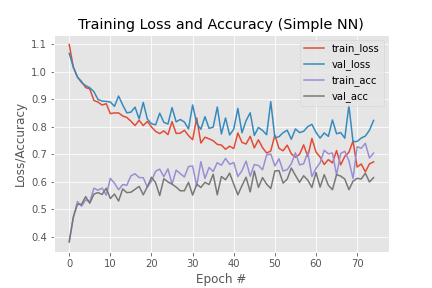

In [ ]:
# строим графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))


In [ ]:
# сохраняем модель и метки классов в бинарном представлении на диск
print("[INFO] serializing network and label binarizer...")
model.save("model.h5", save_format="h5")
f = open("label_bin", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


# Проверка обученной модели пользовательскими данными

In [ ]:
from keras.models import load_model
import argparse
import pickle
import cv2

Saving pandasleep.jpg to pandasleep.jpg


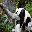

In [ ]:
# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его
image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (32, 32))
cv2_imshow(image)

In [ ]:
# "Выравниваем" изображение (преобразуем его в вектор. Из 32х32х3 -> 3072)
image = image.flatten()
# масштабируем значения пикселей к диапазону [0, 1]
image = image.astype("float") / 255.0
image = image.reshape((1, image.shape[0]))

In [ ]:
# загружаем модель и бинаризатор меток
from keras import models    
print("[INFO] loading network and label binarizer...")
model = models.load_model("model.h5")
lb = pickle.loads(open("label_bin", "rb").read())

[INFO] loading network and label binarizer...


In [ ]:
# делаем предсказание на изображении
preds = model.predict(image)
print(preds)

1/1 [==============================] - 0s 53ms/step
[[0.13489933 0.22197503 0.64312565]]


In [ ]:
# находим индекс метки класса с наибольшей вероятностью
# соответствия
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

In [ ]:
# Добавляем на исходное изображение метку класса и вероятность прогноза
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(0, 0, 255), 2)

array([[[ 54, 154, 124],
        [ 54, 155, 123],
        [ 51, 155, 122],
        ...,
        [ 37, 137, 109],
        [ 38, 140, 112],
        [ 36, 136, 108]],

       [[ 56, 157, 125],
        [ 56, 158, 123],
        [ 54, 158, 123],
        ...,
        [ 36, 133,  99],
        [ 33, 135, 100],
        [ 27, 126,  94]],

       [[ 59, 161, 126],
        [ 58, 160, 125],
        [ 56, 160, 125],
        ...,
        [ 33, 132, 100],
        [ 29, 128,  96],
        [ 19, 116,  84]],

       ...,

       [[ 29,  68,  66],
        [ 29,  68,  66],
        [ 36,  73,  71],
        ...,
        [ 30,  38,  45],
        [ 28,  36,  43],
        [ 20,  28,  35]],

       [[ 25,  64,  62],
        [ 29,  66,  64],
        [ 35,  69,  69],
        ...,
        [ 17,  22,  25],
        [ 18,  23,  26],
        [ 16,  21,  24]],

       [[ 23,  60,  58],
        [ 27,  64,  60],
        [ 33,  67,  67],
        ...,
        [  5,  10,  13],
        [  6,  11,  14],
        [  6,  11,  14]]

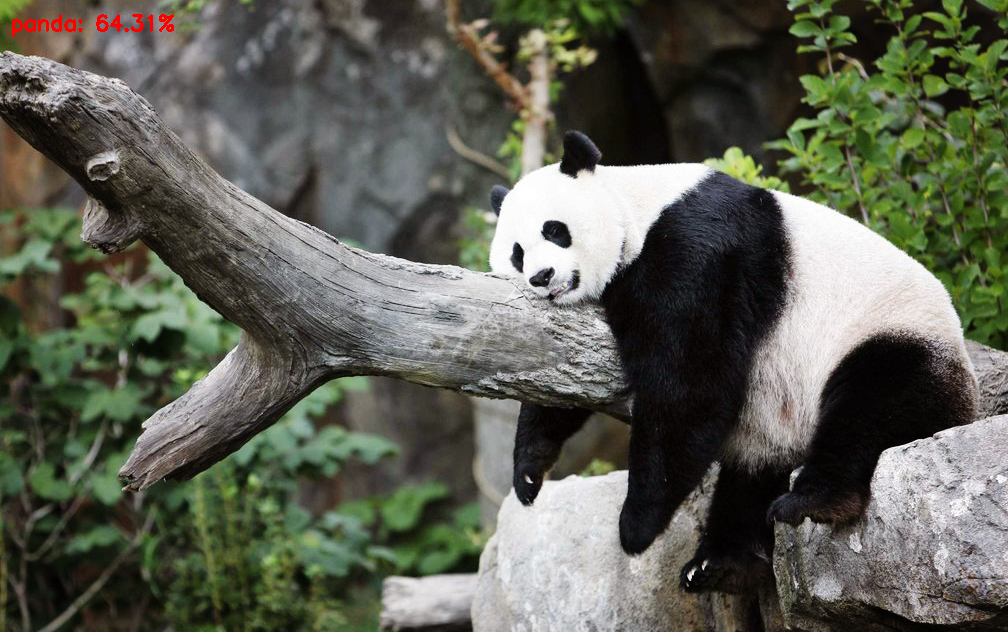

In [ ]:
# показываем выходное изображение
cv2_imshow(output)